In [1]:
# notebook to pinpoint degradation, rapid fire some more ideas

In [42]:
import pandas as pd
from encode_utils.rerank_data import rerank_dist, rerank_single
from encode_utils.efficient_rerank import get_effrerank_model, run_comstyle
from encode_utils.mt_scores import get_scores_auto
from encode_utils.sco_funct import weightaddprob, default_scofunct

from test_efficient_rerank import test_graph_ind

In [14]:
def mean(l):
    return sum(l)/len(l)

In [3]:
noun_explode = pd.read_csv("outputs/score_csvs/nounexplodev1.csv")

In [6]:
gold_vals = rerank_dist(noun_explode, rerank_single, ['utnoun', 'utnoun'])

In [40]:
# get model 
encodemod = get_effrerank_model("noun")

Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Encoder model frozen.
Loading weights from /mnt/data1/prasann/latticegen/lattice-generation/COMET/lightning_logs/version_44/checkpoints/epoch=9-step=40000.ckpt.


In [45]:
res = test_graph_ind("outputs/graph_pickles/frtest_reversed/", 0, encodemod, default_scofunct, "noun")

In [46]:
res

{'hyp': '<s> After all, as a field investigative journalist, she has instilled in many people besides Putin, including the current Chechen Prime Minister Ramzan Kadyrov, not the least of whom she has accused of conducting a policy of abduction for ransom.',
 'ref': 'After all, as a campaigning investigative journalist she made many people angry besides Putin, not least of which is the current Chechen Prime Minister, Ramzan Kadyrov, whom she accused of a policy of kidnapping for ransom. ',
 'src': "Après tout, en tant que journaliste d'investigation en campagne, elle a enragé beaucoup d'autres gens outre Poutine, parmi lesquels l'actuel Premier ministre tchétchène Ramzan Kadyrov n'est pas des moindres, qu'elle a accusé de mener une politique d'enlèvements contre rançons. "}

In [ ]:
get_scores_auto([res['hyp'][4:]], ["noun"], [], "utnoun", "comstyle")

	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
npreds = pd.read_csv("outputs/predcsvs/noun_comstyle_v2.csv")

In [21]:
uns = list(noun_explode['ref'].unique())

In [49]:
res = []
for u in uns: 
    res.append(float(npreds[npreds['ref']==u]['utnoun']))

In [50]:
mean(res)

0.8628873924911022

In [56]:
diffs = [gold_vals[i] - res[i] for i in range(len(res))]

In [58]:
mean(diffs)

0.08779214024543762

In [59]:
import matplotlib.pyplot as plt

(array([ 1.,  1.,  1., 21., 17., 32., 15.,  8.,  3.,  1.]),
 array([-0.16788018, -0.11897451, -0.07006885, -0.02116318,  0.02774248,
         0.07664815,  0.12555381,  0.17445948,  0.22336514,  0.2722708 ,
         0.32117647]),
 <BarContainer object of 10 artists>)

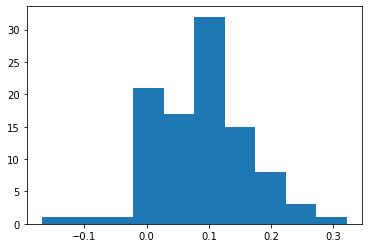

In [60]:
plt.hist(diffs)

In [62]:
for i in range(len(diffs)):
    if diffs[i]<0:
        print(i)

13
24
29
30
75


In [75]:
hyp = npreds[npreds['ref']==uns[13]]['ahyp'].iloc[0]

In [79]:
noun_explode[noun_explode['ref']==uns[13]]

,Unnamed: 0,src,ref,hyp,utnoun,unique_nouns
27070,27070,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path towards much mo...,0.393927,5
27071,27071,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path to much more re...,0.383695,4
27072,27072,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path to a much more ...,0.398260,4
27073,27073,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path towards a much ...,0.409214,4
27074,27074,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path towards far mor...,0.390841,5
...,...,...,...,...,...,...
28342,28342,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path towards far mor...,0.621482,8
28343,28343,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path toward much mor...,0.623692,7
28344,28344,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path to far more res...,0.606072,7
28345,28345,En l’absence d'une voie claire vers une union ...,Absent a clear path to a much tighter fiscal a...,In the absence of a clear path towards much mo...,0.623454,8


In [80]:
hyp

'In the absence of a clear path towards a much more restrictive financial and political union, which can only be achieved by means of a constitutional change, the euro system’s current “transition house" of the euro system looks increasingly unsustainable.'